In [1]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import networkx as nx
import datetime
import fuzzywuzzy
from fuzzywuzzy import process
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.gridspec as gridspec
import warnings; warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)
import chardet
from scipy import stats
from mlxtend.preprocessing import minmax_scaling

In [2]:
nba = "https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/2021-2022%20NBA%20Player%20Stats/2021-2022%20NBA%20Player%20Stats.csv"
players = pd.read_csv(nba, delimiter=";", encoding="latin-1", index_col=0)
players.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,C,22,TOR,34,20,25.3,3.4,8.1,0.412,0.3,1.3,0.233,3.1,6.9,0.444,0.430,0.9,1.6,0.574,2.4,5.3,7.7,1.3,0.6,0.6,1.1,2.2,7.9
2,Steven Adams,C,28,MEM,44,43,25.7,2.6,4.9,0.521,0.0,0.0,0.000,2.6,4.9,0.521,0.521,1.6,2.8,0.566,4.3,4.9,9.3,3.0,1.0,0.6,1.6,1.7,6.7
3,Bam Adebayo,C,24,MIA,21,21,32.9,6.9,13.3,0.518,0.0,0.0,0.000,6.9,13.3,0.520,0.518,4.9,6.3,0.767,2.6,7.3,10.0,3.2,1.2,0.5,2.9,3.1,18.7
4,Santi Aldama,PF,21,MEM,25,0,10.5,1.4,3.8,0.372,0.2,1.5,0.105,1.2,2.2,0.554,0.394,0.4,0.8,0.579,0.9,1.6,2.5,0.5,0.1,0.2,0.3,0.9,3.4
5,LaMarcus Aldridge,C,36,BRK,32,10,23.1,5.9,10.3,0.574,0.4,1.1,0.333,5.6,9.2,0.603,0.592,1.6,1.8,0.862,1.5,4.1,5.7,0.9,0.4,1.1,0.8,1.7,13.8
6,Nickeil Alexander-Walker,SG,23,NOP,42,18,26.5,4.7,12.8,0.370,2.0,6.2,0.313,2.8,6.6,0.424,0.446,1.2,1.7,0.704,0.8,2.6,3.4,2.6,0.8,0.3,1.6,1.8,12.6
7,Grayson Allen,SG,26,MIL,41,40,28.1,4.1,9.6,0.423,2.6,6.7,0.391,1.5,3.0,0.496,0.558,1.0,1.2,0.857,0.5,2.9,3.4,1.3,0.8,0.4,0.6,1.5,11.8
8,Jarrett Allen,C,23,CLE,39,39,32.7,6.7,9.6,0.695,0.0,0.2,0.125,6.6,9.4,0.708,0.697,2.9,4.2,0.697,3.3,7.6,10.9,1.8,0.8,1.4,1.9,1.8,16.3
9,Jose Alvarado,PG,23,NOP,18,0,9.2,1.1,3.1,0.364,0.4,1.4,0.269,0.7,1.6,0.448,0.427,0.5,0.8,0.643,0.3,0.7,1.0,1.6,1.0,0.1,0.2,1.0,3.1


In [3]:
players.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'], dtype='object')

In [4]:
missing_values_count = players.isnull().sum()
missing_values_count[:]

Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [5]:
Efficiency = players.PTS + players.TRB + players.AST + players.STL + players.BLK - (players.FGA - players.FG) - (players.FTA - players.FT) - players.TOV
players.insert(29, "EFF", Efficiency)
players.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,EFF
Rk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,C,22,TOR,34,20,25.3,3.4,8.1,0.412,0.3,1.3,0.233,3.1,6.9,0.444,0.430,0.9,1.6,0.574,2.4,5.3,7.7,1.3,0.6,0.6,1.1,2.2,7.9,11.6
2,Steven Adams,C,28,MEM,44,43,25.7,2.6,4.9,0.521,0.0,0.0,0.000,2.6,4.9,0.521,0.521,1.6,2.8,0.566,4.3,4.9,9.3,3.0,1.0,0.6,1.6,1.7,6.7,15.5
3,Bam Adebayo,C,24,MIA,21,21,32.9,6.9,13.3,0.518,0.0,0.0,0.000,6.9,13.3,0.520,0.518,4.9,6.3,0.767,2.6,7.3,10.0,3.2,1.2,0.5,2.9,3.1,18.7,22.9
4,Santi Aldama,PF,21,MEM,25,0,10.5,1.4,3.8,0.372,0.2,1.5,0.105,1.2,2.2,0.554,0.394,0.4,0.8,0.579,0.9,1.6,2.5,0.5,0.1,0.2,0.3,0.9,3.4,3.6
5,LaMarcus Aldridge,C,36,BRK,32,10,23.1,5.9,10.3,0.574,0.4,1.1,0.333,5.6,9.2,0.603,0.592,1.6,1.8,0.862,1.5,4.1,5.7,0.9,0.4,1.1,0.8,1.7,13.8,16.5
6,Nickeil Alexander-Walker,SG,23,NOP,42,18,26.5,4.7,12.8,0.370,2.0,6.2,0.313,2.8,6.6,0.424,0.446,1.2,1.7,0.704,0.8,2.6,3.4,2.6,0.8,0.3,1.6,1.8,12.6,9.5
7,Grayson Allen,SG,26,MIL,41,40,28.1,4.1,9.6,0.423,2.6,6.7,0.391,1.5,3.0,0.496,0.558,1.0,1.2,0.857,0.5,2.9,3.4,1.3,0.8,0.4,0.6,1.5,11.8,11.4
8,Jarrett Allen,C,23,CLE,39,39,32.7,6.7,9.6,0.695,0.0,0.2,0.125,6.6,9.4,0.708,0.697,2.9,4.2,0.697,3.3,7.6,10.9,1.8,0.8,1.4,1.9,1.8,16.3,25.1
9,Jose Alvarado,PG,23,NOP,18,0,9.2,1.1,3.1,0.364,0.4,1.4,0.269,0.7,1.6,0.448,0.427,0.5,0.8,0.643,0.3,0.7,1.0,1.6,1.0,0.1,0.2,1.0,3.1,4.3


In [6]:
players_C = players[players.Pos == "C"]
players_PG = players[players.Pos == "PG"]
players_SG = players[players.Pos == "SG"]
players_PF = players[players.Pos == "PF"]
players_SF = players[players.Pos == "SF"]

players_PG.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,EFF
Rk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9,Jose Alvarado,PG,23,NOP,18,0,9.2,1.1,3.1,0.364,0.4,1.4,0.269,0.7,1.6,0.448,0.427,0.5,0.8,0.643,0.3,0.7,1.0,1.6,1.0,0.1,0.2,1.0,3.1,4.3
15,Cole Anthony,PG,21,ORL,33,33,33.2,6.2,15.8,0.396,2.4,7.2,0.328,3.9,8.5,0.454,0.471,3.4,4.0,0.835,0.6,5.5,6.1,5.8,0.8,0.3,2.8,2.7,18.2,18.2
18,D.J. Augustin,PG,34,HOU,33,2,15.0,1.7,4.0,0.414,1.2,2.8,0.415,0.5,1.2,0.410,0.560,1.0,1.2,0.868,0.2,1.0,1.2,2.2,0.3,0.0,1.3,0.5,5.5,5.4
24,LaMelo Ball,PG,20,CHO,39,39,31.8,6.9,16.5,0.418,2.7,7.3,0.371,4.2,9.3,0.454,0.499,2.5,2.8,0.883,1.7,5.6,7.3,7.7,1.6,0.4,3.1,3.0,19.0,23.0
25,Lonzo Ball,PG,24,CHI,35,35,34.6,4.6,10.9,0.423,3.1,7.4,0.423,1.5,3.5,0.423,0.567,0.6,0.8,0.750,1.0,4.4,5.4,5.1,1.8,0.9,2.3,2.4,13.0,17.4
29,Cat Barber,PG,27,ATL,3,0,4.3,0.0,1.3,0.000,0.0,0.0,0.000,0.0,1.3,0.000,0.000,0.0,1.3,0.000,0.3,0.7,1.0,1.0,0.0,0.0,0.3,0.3,0.0,-0.9
45,Patrick Beverley,PG,33,MIN,32,28,26.1,3.1,7.6,0.407,1.2,3.9,0.312,1.9,3.7,0.508,0.488,1.3,1.9,0.689,1.2,3.3,4.5,5.0,1.2,0.9,1.2,2.8,8.7,14.0
51,Eric Bledsoe,PG,32,LAC,47,29,25.9,3.7,8.8,0.422,1.0,3.0,0.324,2.7,5.7,0.474,0.478,1.6,2.1,0.768,0.6,2.9,3.4,4.1,1.3,0.4,2.2,1.5,10.0,11.4
68,Malcolm Brogdon,PG,29,IND,28,28,33.4,6.6,14.7,0.448,1.6,5.4,0.307,4.9,9.3,0.529,0.504,3.8,4.4,0.861,0.9,4.3,5.1,5.9,0.9,0.4,2.2,2.0,18.5,19.9


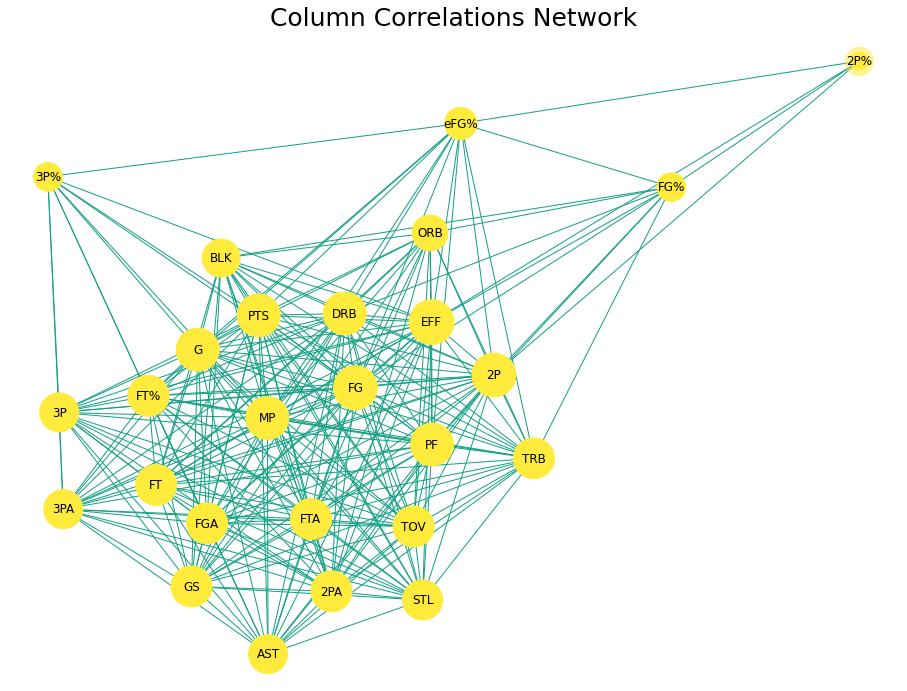

<AxesSubplot:xlabel='Pos', ylabel='PTS'>

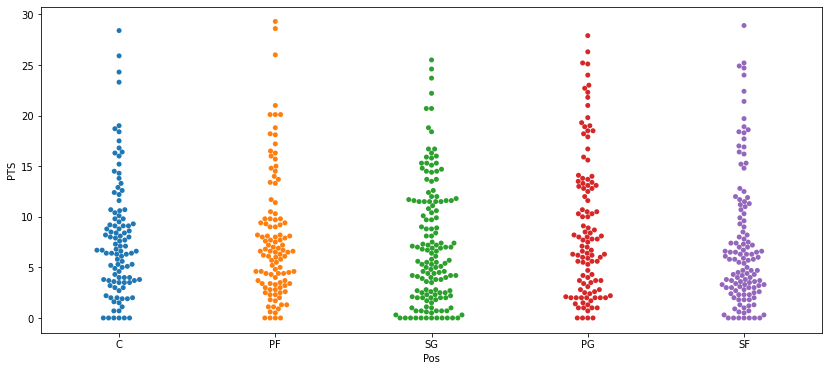

In [7]:
main_color = "#16a085"
strong_main_color = "#ffeb3b"
custom_colors = [strong_main_color, main_color]

df = players

thresh = 0.3
def correlation_network(data, corr_interval=[-0.9, 0.9], data_type="Train", node_color=custom_colors[1]):
    data = data
    corr = data.corr()
    corr = pd.melt(corr.reset_index(), id_vars="index")
    corr.columns = ["x", "y", "value"]
    high_corr = corr[((corr["value"] <= corr_interval[0]) | (corr["value"] >= corr_interval[1]))]
    high_corr = high_corr[(high_corr["value"] != 1)].reset_index(drop=True)
    sources = list(high_corr.x.unique())
    targets = list(high_corr.y.unique())
    plt.figure(figsize=(16, 12))
    g = nx.from_pandas_edgelist(high_corr, source="x", target="y") 
    layout = nx.spring_layout(g, iterations=50, k=0.6, seed=1337)
    target_size = [g.degree(t) * 80 for t in targets]
    nx.draw_networkx_nodes(g, layout, nodelist=targets, node_size=target_size, node_color=node_color)
    nx.draw_networkx_nodes(g, layout, nodelist=sources, node_color=node_color, node_size=800, alpha=0.5)
    nx.draw_networkx_edges(g, layout, width=1, edge_color=custom_colors[1])
    target_dict = dict(zip(targets, targets))
    nx.draw_networkx_labels(g, layout, labels=target_dict)
    plt.axis("off")
    plt.title(f"Column Correlations Network", fontsize=25)
    plt.show()
correlation_network(data=df, corr_interval=[-thresh, thresh], data_type="Train", node_color=custom_colors[0])

plt.figure(figsize=(14,6))
sns.swarmplot(x=players["Pos"],
              y=players["PTS"])

In [8]:
print("Points mean C: " + str(round(players_C.PTS.mean())))
print("Points mean PG: " + str(round(players_PG.PTS.mean())))
print("Points mean SG: " + str(round(players_SG.PTS.mean())))
print("Points mean PF: " + str(round(players_PF.PTS.mean())))
print("Points mean SF: " + str(round(players_SF.PTS.mean())))

Points mean C: 8
Points mean PG: 9
Points mean SG: 7
Points mean PF: 8
Points mean SF: 7


<AxesSubplot:xlabel='Pos', ylabel='EFF'>

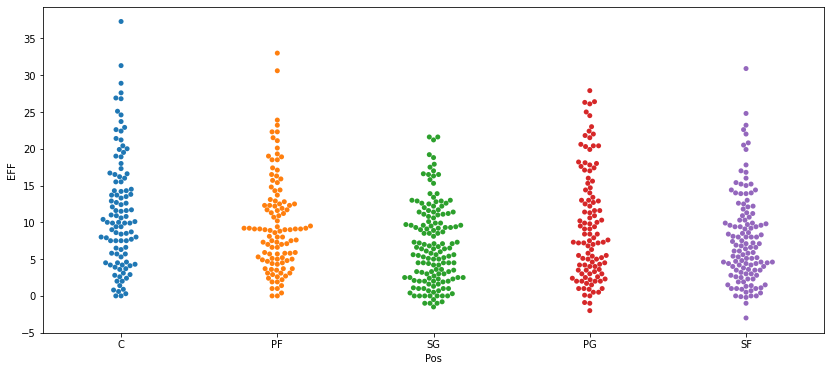

In [9]:
plt.figure(figsize=(14,6))
sns.swarmplot(x=players["Pos"],
              y=players["EFF"])

In [10]:
print("Efficiency mean C: " + str(round(players_C.EFF.mean())))
print("Efficiency mean PG: " + str(round(players_PG.EFF.mean())))
print("Efficiency mean SG: " + str(round(players_SG.EFF.mean())))
print("Efficiency mean PF: " + str(round(players_PF.EFF.mean())))
print("Efficiency mean SF: " + str(round(players_SF.EFF.mean())))

Efficiency mean C: 12
Efficiency mean PG: 10
Efficiency mean SG: 7
Efficiency mean PF: 10
Efficiency mean SF: 8


<AxesSubplot:xlabel='Age', ylabel='PTS'>

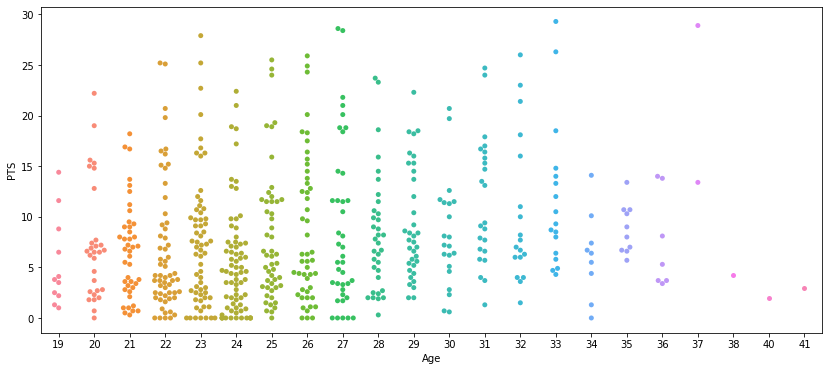

In [11]:
plt.figure(figsize=(14,6))
sns.swarmplot(x=players["Age"],
              y=players["PTS"])

In [12]:
print(players.Player[(players.Age>=30) & (players.PTS>=25)])

Rk
123    Stephen Curry
131    DeMar DeRozan
150     Kevin Durant
266     LeBron James
Name: Player, dtype: object


In [13]:
players.Age.describe().round(decimals=1)

count    590.0
mean      25.8
std        4.2
min       19.0
25%       23.0
50%       25.0
75%       28.0
max       41.0
Name: Age, dtype: float64

In [14]:
Cs = pd.DataFrame(players_C.Player[(players_C.Age<=23)&(players_C.PTS>=10)&(players_C.EFF>=12)]).rename(columns={"Player": "Centers"}).reset_index(drop=True)
PGs = pd.DataFrame(players_PG.Player[(players_PG.Age<=23)&(players_PG.PTS>=10)&(players_PG.EFF>=12)]).rename(columns={"Player": "Point Guards"}).reset_index(drop=True)
SGs = pd.DataFrame(players_SG.Player[(players_SG.Age<=23)&(players_SG.PTS>=10)&(players_SG.EFF>=12)]).rename(columns={"Player": "Shooting Guards"}).reset_index(drop=True)
PFs = pd.DataFrame(players_PF.Player[(players_PF.Age<=23)&(players_PF.PTS>=10)&(players_PF.EFF>=12)]).rename(columns={"Player": "Power Forwards"}).reset_index(drop=True)
SFs = pd.DataFrame(players_SF.Player[(players_SF.Age<=23)&(players_SF.PTS>=10)&(players_SF.EFF>=12)]).rename(columns={"Player": "Small Forwards"}).reset_index(drop=True)

future = pd.concat([Cs, PGs, SGs, PFs, SFs], axis=1, join="outer")
future

,Centers,Point Guards,Shooting Guards,Power Forwards,Small Forwards
0,Jarrett Allen,Cole Anthony,Hamidou Diallo,Scottie Barnes,Desmond Bane
1,Deandre Ayton,LaMelo Ball,Anthony Edwards,Miles Bridges,RJ Barrett
2,Mo Bamba,Cade Cunningham,Josh Giddey,Jaren Jackson Jr.,Saddiq Bey
3,Wendell Carter Jr.,Luka Don?i?,Tyrese Haliburton,Evan Mobley,Luguentz Dort
4,NaN,Darius Garland,Tyler Herro,NaN,Keldon Johnson
5,NaN,Shai Gilgeous-Alexander,Kevin Huerter,NaN,Jayson Tatum
6,NaN,Tyrese Maxey,Malik Monk,NaN,Franz Wagner
7,NaN,Ja Morant,Jordan Poole,NaN,NaN
8,NaN,Kevin Porter Jr.,Anfernee Simons,NaN,NaN
9,NaN,Trae Young,Gary Trent Jr.,NaN,NaN
